### Load Dataset

In [11]:
from fastai.tabular.all import *

In [41]:
path = untar_data(URLs.HUMAN_NUMBERS)

In [42]:
path

Path('/home/user/.fastai/data/human_numbers')

In [43]:
path.ls()

(#2) [Path('/home/user/.fastai/data/human_numbers/train.txt'),Path('/home/user/.fastai/data/human_numbers/valid.txt')]

In [44]:
lines = []
for fn in path.ls():
   with open(fn,'r') as f:
        lines.append(f.readlines())
    

In [45]:
train, valid = lines[0], lines[1]

In [46]:
train[:22]

['one \n',
 'two \n',
 'three \n',
 'four \n',
 'five \n',
 'six \n',
 'seven \n',
 'eight \n',
 'nine \n',
 'ten \n',
 'eleven \n',
 'twelve \n',
 'thirteen \n',
 'fourteen \n',
 'fifteen \n',
 'sixteen \n',
 'seventeen \n',
 'eighteen \n',
 'nineteen \n',
 'twenty \n',
 'twenty one \n',
 'twenty two \n']

#### Find vocab

In [47]:
tmp = [e.strip('\n').rstrip(' ') for e in train]
tmp = [list(e) for e in tmp]
tmp = [sublist for l in tmp for sublist in l]

vocab = list(set(tmp))
print(len(vocab))
vocab

19


['x',
 'r',
 's',
 'l',
 'd',
 'h',
 'a',
 'f',
 'y',
 'g',
 'e',
 'w',
 'v',
 't',
 ' ',
 'u',
 'o',
 'n',
 'i']

In [50]:
import pandas as pd

In [51]:
vocab = sorted(vocab)
[(i, v) for i,v in enumerate(vocab)]

[(0, ' '),
 (1, 'a'),
 (2, 'd'),
 (3, 'e'),
 (4, 'f'),
 (5, 'g'),
 (6, 'h'),
 (7, 'i'),
 (8, 'l'),
 (9, 'n'),
 (10, 'o'),
 (11, 'r'),
 (12, 's'),
 (13, 't'),
 (14, 'u'),
 (15, 'v'),
 (16, 'w'),
 (17, 'x'),
 (18, 'y')]

#### PreProcessing

In [57]:
x = [e.strip('\n').rstrip(' ') for e in train]
x = [list(e) for e in x]
x = [[vocab.index(letter) for letter in word] for word in x]

In [269]:
x[:10]

[[10, 9, 3],
 [13, 16, 10],
 [13, 6, 11, 3, 3],
 [4, 10, 14, 11],
 [4, 7, 15, 3],
 [12, 7, 17],
 [12, 3, 15, 3, 9],
 [3, 7, 5, 6, 13],
 [9, 7, 9, 3],
 [13, 3, 9]]

In [62]:
max_words = max([len(e) for e in x])
max_words

42

In [63]:
num_chars = (len(vocab) + 1)
num_chars

20

In [64]:
num_features = max_words * num_chars
num_features

840

#### Build DataFrame
Of one-hot encodings

In [78]:
blank = [0] * num_features

res = []
for word in x:
    row = copy(blank)
    for ifeat in range(max_words):
        
        if len(word) > ifeat:
            feat_ind = word[ifeat]
        else:
            feat_ind = num_chars - 1
        
        row[(ifeat*num_chars) + feat_ind] = 1

    res.append(row)


In [89]:
vocab_plus = copy(vocab)
vocab_plus[0] = '_'
vocab_plus.append('na')

cols = [f'{_vocab}{_ind}' for _ind in range(max_words)
                          for _vocab in vocab_plus     ]

In [93]:
df = pd.DataFrame(res, columns=cols)

In [ ]:
# pd.set_option("max_rows", 20)
# pd.set_option("max_columns", 20)
# df

In [114]:
from IPython.display import display
with pd.option_context('max_rows', None, 'max_columns', 200):
    display(df.iloc[:2, :])

,_0,a0,d0,e0,f0,g0,h0,i0,l0,n0,o0,r0,s0,t0,u0,v0,w0,x0,y0,na0,_1,a1,d1,e1,f1,g1,h1,i1,l1,n1,o1,r1,s1,t1,u1,v1,w1,x1,y1,na1,_2,a2,d2,e2,f2,g2,h2,i2,l2,n2,o2,r2,s2,t2,u2,v2,w2,x2,y2,na2,_3,a3,d3,e3,f3,g3,h3,i3,l3,n3,o3,r3,s3,t3,u3,v3,w3,x3,y3,na3,_4,a4,d4,e4,f4,g4,h4,i4,l4,n4,o4,r4,s4,t4,u4,v4,w4,x4,y4,na4,...,_37,a37,d37,e37,f37,g37,h37,i37,l37,n37,o37,r37,s37,t37,u37,v37,w37,x37,y37,na37,_38,a38,d38,e38,f38,g38,h38,i38,l38,n38,o38,r38,s38,t38,u38,v38,w38,x38,y38,na38,_39,a39,d39,e39,f39,g39,h39,i39,l39,n39,o39,r39,s39,t39,u39,v39,w39,x39,y39,na39,_40,a40,d40,e40,f40,g40,h40,i40,l40,n40,o40,r40,s40,t40,u40,v40,w40,x40,y40,na40,_41,a41,d41,e41,f41,g41,h41,i41,l41,n41,o41,r41,s41,t41,u41,v41,w41,x41,y41,na41
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Build Auto-regressive DF

In [118]:
import copy

In [119]:
x_tmp = copy.deepcopy(x)
x_tmp = x_tmp[:1000]
len(x_tmp)

1000

In [141]:
x_ar = []
y_ar = []

for word in x_tmp:
    for ipos in range(len(word)-1, 0, -1):
        y_ar.append(word[ipos])
        x_ar.append(word[:ipos])

In [142]:
len(y_ar), len(x_ar)

(19963, 19963)

In [143]:
x_tmp[:10]

[[10, 9, 3],
 [13, 16, 10],
 [13, 6, 11, 3, 3],
 [4, 10, 14, 11],
 [4, 7, 15, 3],
 [12, 7, 17],
 [12, 3, 15, 3, 9],
 [3, 7, 5, 6, 13],
 [9, 7, 9, 3],
 [13, 3, 9]]

In [144]:
x_ar[:10]

[[10, 9],
 [10],
 [13, 16],
 [13],
 [13, 6, 11, 3],
 [13, 6, 11],
 [13, 6],
 [13],
 [4, 10, 14],
 [4, 10]]

In [145]:
y_ar[:10]

[3, 9, 10, 16, 3, 3, 11, 6, 11, 14]

In [146]:
def one_hot_mat(x):
    
    blank = [0] * num_features

    res = []
    for word in x:
        row = copy.copy(blank)
        for ifeat in range(max_words):

            if len(word) > ifeat:
                feat_ind = word[ifeat]
            else:
                feat_ind = num_chars - 1

            row[(ifeat*num_chars) + feat_ind] = 1

        res.append(row)
    return res


In [147]:
x_ar_onehot = one_hot_mat(x_ar)

In [149]:
vocab_plus = copy.copy(vocab)
vocab_plus[0] = '_'
vocab_plus.append('na')

cols = [f'{_vocab}{_ind}' for _ind in range(max_words)
                          for _vocab in vocab_plus     ]

In [150]:
df_x = pd.DataFrame(x_ar_onehot, columns=cols)

In [151]:
df_x

,_0,a0,d0,e0,f0,g0,h0,i0,l0,n0,...,o41,r41,s41,t41,u41,v41,w41,x41,y41,na41
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [168]:
# don't need to one hot encode Y for sklearn models
# y_ar_onehot = one_hot_mat(y_ar)
# df_y = pd.DataFrame(y_ar_onehot, columns=vocab_plus)

#### Modelling
Using only a subset of the data

In [182]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [183]:
N = 1_000
X, Y = df_x[:N], y_ar[:N]
Xt, Xv, Yt, Yv = train_test_split(X,Y)

In [184]:
lr = LogisticRegression(max_iter=1_000)

In [185]:
lr.fit(Xt, Yt)

LogisticRegression(max_iter=1000)

In [186]:
lr.score(Xt, Yt), lr.score(Xv, Yv)

(0.8053333333333333, 0.736)

#### Evaluation 0

In [187]:
lr.coef_.shape

(18, 840)

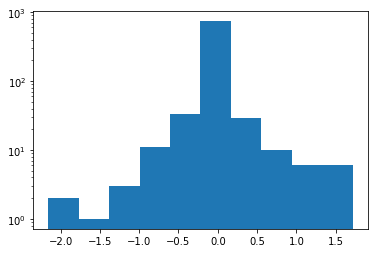

In [188]:
plt.hist(lr.coef_[2,:], log=True);

#### Evaluation 1

In [216]:
num_per_class = [Yt.count(i) for i in range(max(Yt))]
num_per_class

[76, 0, 18, 121, 18, 16, 40, 70, 3, 82, 32, 40, 12, 88, 16, 24, 18, 18]

In [221]:
# most frequesnt char
vocab_plus[num_per_class.index(max(num_per_class))]

'e'

In [218]:
# baseline accuracy, always predicting 'e'
max(num_per_class) / len(Yt)

0.16133333333333333

#### Evaluation 2
Looks pretty good but gets worse for longer words

In [222]:
yhat = lr.predict(Xv)

In [257]:
Yv_decode =   [vocab[i] for i in Yv]
yhat_decode = [vocab[i] for i in yhat]
yhat_decode[:5], Yv_decode[:5]

([' ', ' ', 't', 'i', 'i'], [' ', ' ', 't', 'o', 'e'])

In [255]:
vocab_new = copy.copy(vocab)
vocab_new.append('$')

tmp  = Xv.to_numpy().tolist()
res = []
for row in tmp:
    tmp_row = []
    for i in range(max_words):
        ind0 =  i    * num_chars
        ind1 = (i+1) * num_chars
        _char = vocab_new[row[ind0:ind1].index(1)]
        tmp_row.append(_char)
    res.append(''.join(tmp_row))

Xv_decode = [e.replace('$', '') + '_' for e in res]

In [254]:
Xv_decode[:4]

['forty_', 'one hundred_', 'seven_', 'f_']

In [266]:
pred_df = pd.DataFrame({'X': Xv_decode, 
                       'Y': Yv_decode, 
                       'Yhat': yhat_decode})

pred_df['Miss'] = ['X' if e else '' for e in pred_df['Y'] != pred_df['Yhat']] 

In [272]:
with pd.option_context('display.max_rows', None):
    display(pred_df)

,X,Y,Yhat,Miss
0,forty_,,,
1,one hundred_,,,
2,seven_,t,t,
3,f_,o,i,X
4,s_,e,i,X
5,one h_,u,u,
6,one hu_,n,n,
7,eigh_,t,t,
8,one hundred _,f,e,X
9,eight_,y,y,


#### RandomForest
Not as good as LR, and more variance, perhaps hyper params need tuning?

In [197]:
rf = RandomForestClassifier()

In [198]:
rf.fit(Xt, Yt)

RandomForestClassifier()

In [199]:
rf.score(Xt, Yt), rf.score(Xv, Yv)

(0.8706666666666667, 0.688)

#### Analysis on it
How to visualize a tree?

In [202]:
len(rf.estimators_)

100

In [204]:
tree0 = rf.estimators_[0]

In [209]:
tmp = tree0.tree_

In [210]:
tmp

In [211]:
type(tmp), type(tree0)

(sklearn.tree._tree.Tree, sklearn.tree._classes.DecisionTreeClassifier)

In [214]:
tmp.max_depth

21